In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-09-21 04:12:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-09-21 04:12:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-09-21 04:12:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

print(fruits.shape)
print(fruits_2d.shape)

(300, 100, 100)
(300, 10000)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

(50, 10000)


In [ ]:
draw_fruits(fruits)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

(50, 10000)


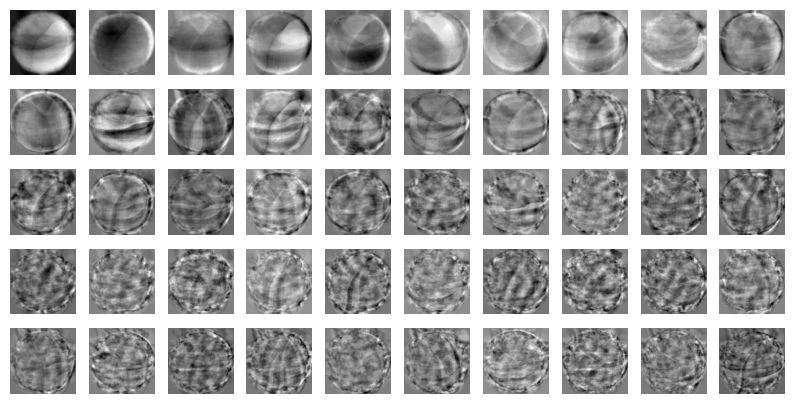

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

(300, 50)


(300, 10000)


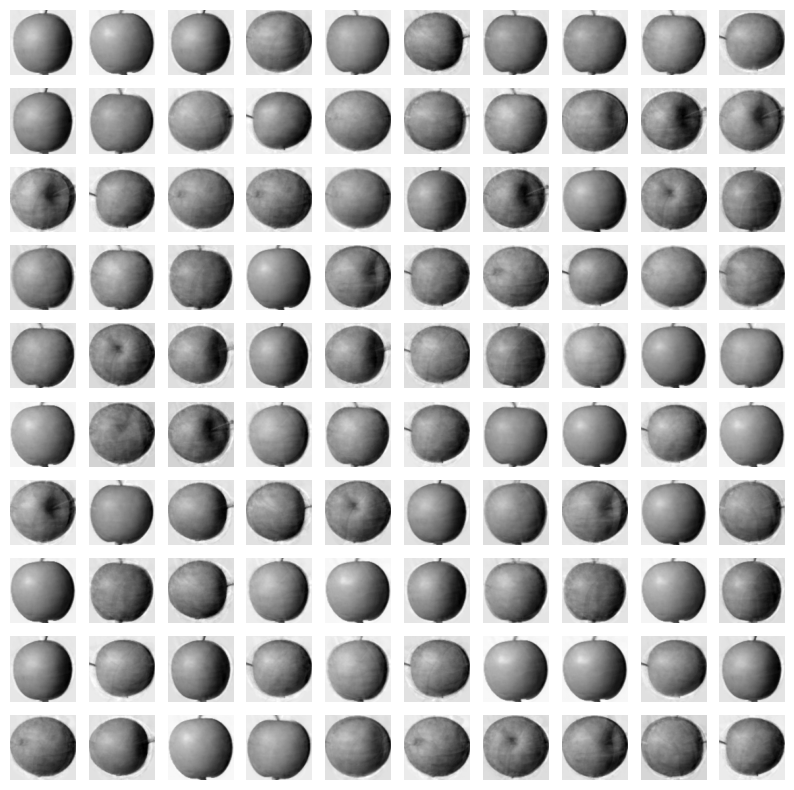

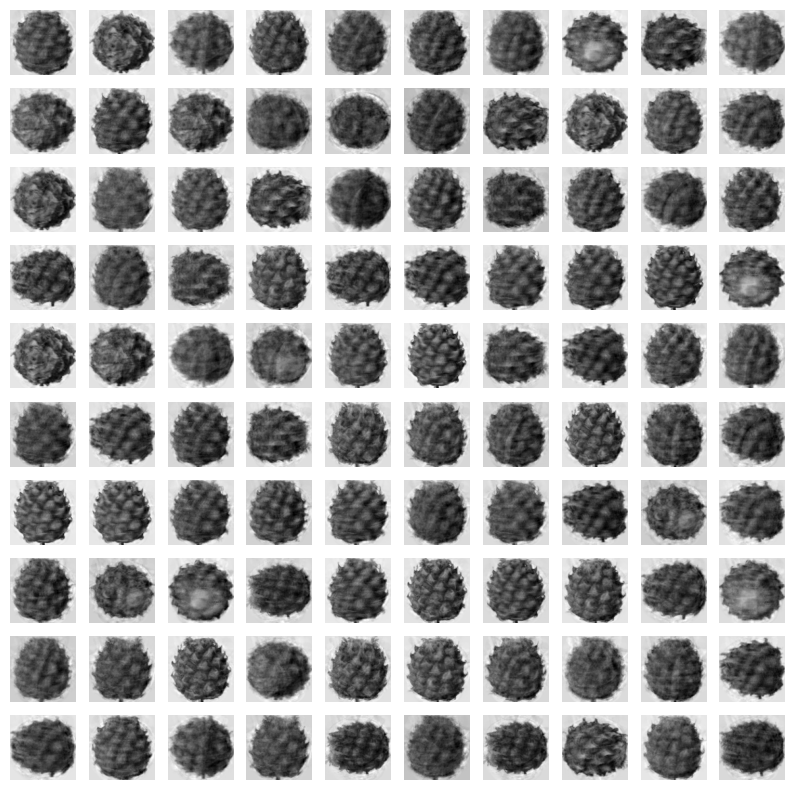

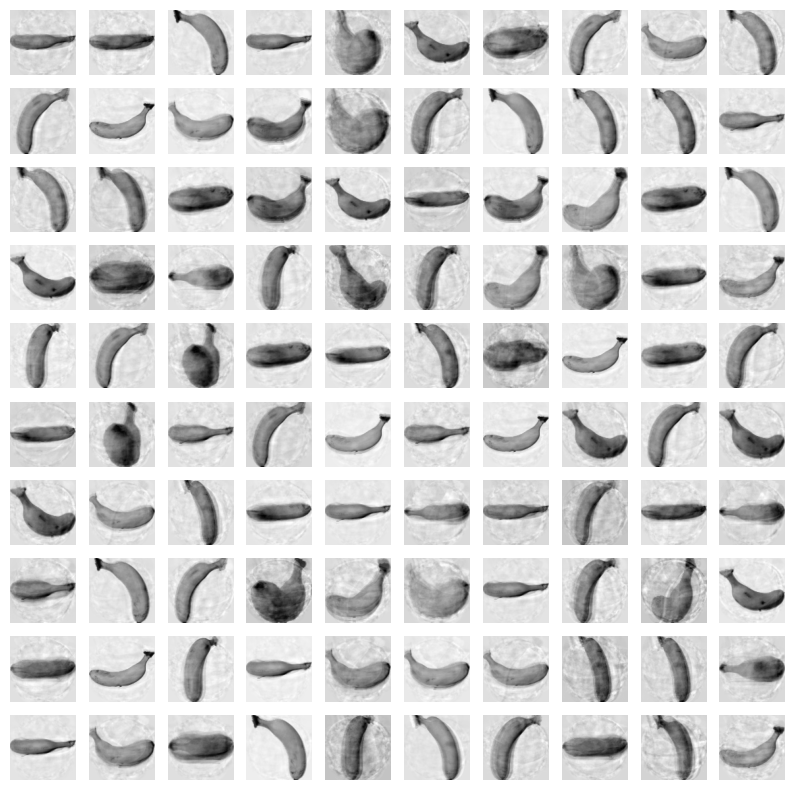

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)  # PCA 주성분을 사용하여 데이터를 재구성하고, 결과를 fruits_inverse에 저장
print(fruits_inverse.shape)  # 재구성된 데이터의 형태(크기)를 출력

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)  # 재구성된 데이터를 원래 이미지의 차원 형태로 변환

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])  # 재구성된 과일 이미지를 시각화
    print("\n")  # 과일 이미지를 출력하고 개행하여 구분
